### CS 181 Practical, Spring 2023
Christopher Lee, Justin Liu, Karina Wang

### Install libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

### Load raw amplitude data as a numpy object.

In [3]:
# Load train data

X_amp_train = np.load("data/Xtrain_amp.npy")
y_amp_train = np.load("data/ytrain_amp.npy")

In [4]:
X_amp_train.shape

(5553, 44100)

In [5]:
# Load test data

X_amp_test = np.load("data/Xtest_amp.npy")
y_amp_test = np.load("data/ytest_amp.npy")

In [6]:
X_amp_test.shape

(2197, 44100)

### Load Mel spectrogram data as a numpy object.

In [7]:
# Load train data

X_mel_train = np.load("data/Xtrain_mel.npy")
y_mel_train = np.load("data/ytrain_mel.npy")

In [8]:
X_mel_train.shape

(5553, 128, 87)

In [9]:
# Flatten X_mel_train's spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_train_flat.shape

(5553, 11136)

In [10]:
# Load test data
X_mel_test = np.load("data/Xtest_mel.npy")
y_mel_test = np.load("data/ytest_mel.npy")

In [11]:
X_mel_test.shape

(2197, 128, 87)

In [12]:
# Flatten X_mel_test's spectrogram features
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)
X_mel_test_flat.shape

(2197, 11136)

### Exploratory Data Analysis

In [13]:
X_amp_train.shape

(5553, 44100)

In [14]:
(y_amp_train == y_mel_train).all()

True

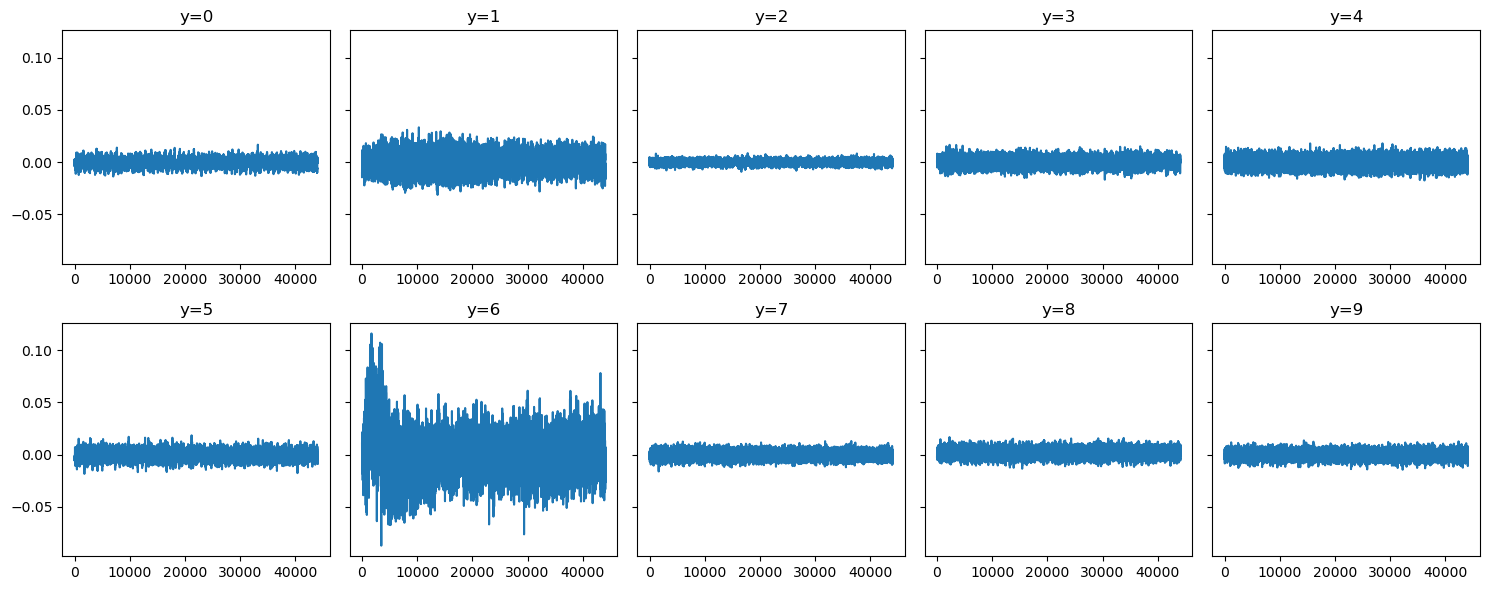

In [15]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6), sharey=True)
axs = ax.ravel()
for i in range(10):
  axs[i].plot(X_amp_train[y_amp_train == i].mean(axis=0))
  axs[i].set_title(f"y={i}")
plt.tight_layout()
plt.show()

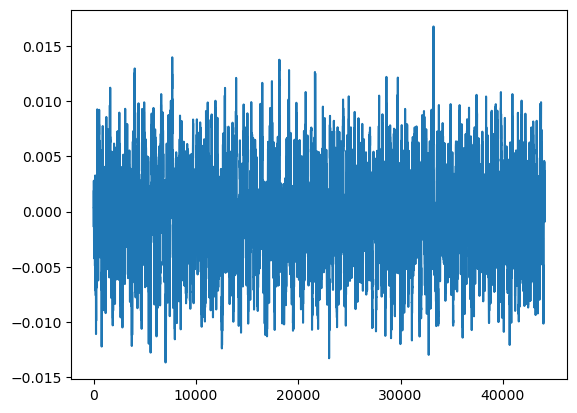

In [38]:
# plt.plot(X_amp_train[y_amp_train == 0].mean(axis=0))
plt.plot(X_amp_train[y_amp_train == 0].mean(axis=0))
plt.show()


In [16]:
X_mel_train[y_mel_train == 0].shape

(700, 128, 87)

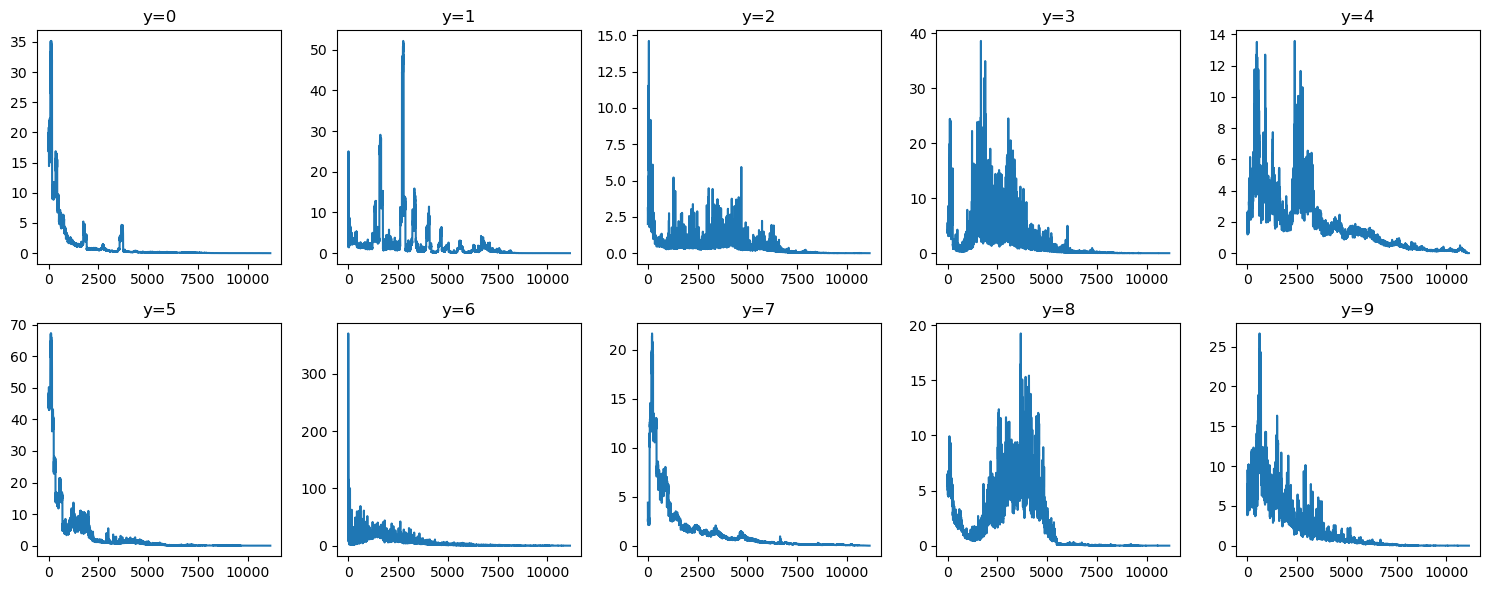

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
axs = ax.ravel()
for i in range(10):
  axs[i].plot(X_mel_train_flat[y_mel_train == i].mean(axis=0))
  axs[i].set_title(f"y={i}")
plt.tight_layout()
plt.show()

In [71]:
X_mel_train[y_mel_train == 0][:,0,0].shape

(700,)

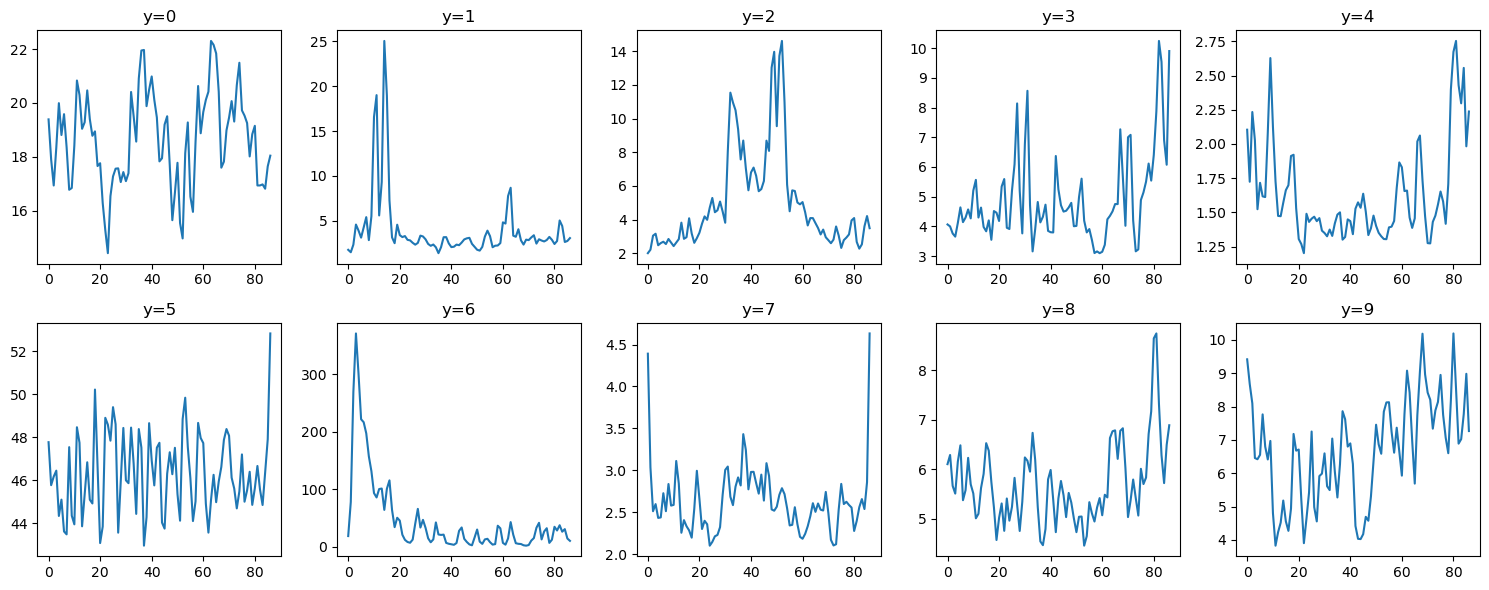

In [70]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
axs = ax.ravel()
for i in range(10):
  axs[i].plot(X_mel_train[y_mel_train == i][:,0,:].mean(axis=0))
  axs[i].set_title(f"y={i}")
plt.tight_layout()
plt.show()


In [18]:
X_mel_train_flat.shape

(5553, 11136)

In [19]:
X_mel_train_flat[X_mel_train_flat - X_mel_train_flat.mean(axis=0) < 2*np.std(X_mel_train_flat.mean(axis=0))]

array([2.3592621e-04, 6.0114849e-05, 3.3983404e-06, ..., 6.8787262e-03,
       6.3228812e-03, 9.0555875e-03], dtype=float32)

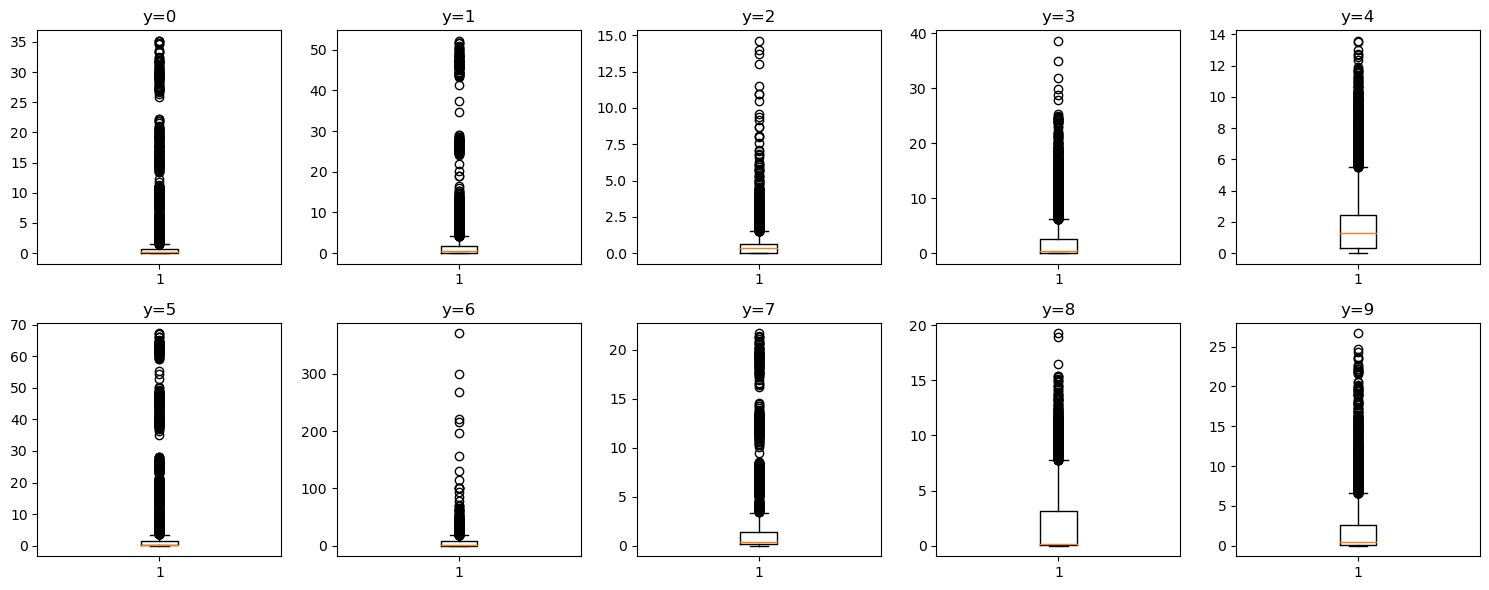

In [20]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
axs = ax.ravel()
for i in range(10):
  axs[i].boxplot(X_mel_train_flat[y_mel_train == i].mean(axis=0))
  axs[i].set_title(f"y={i}")
plt.tight_layout()
plt.show()

In [21]:
len(X_mel_train[X_mel_train == 0])

23936

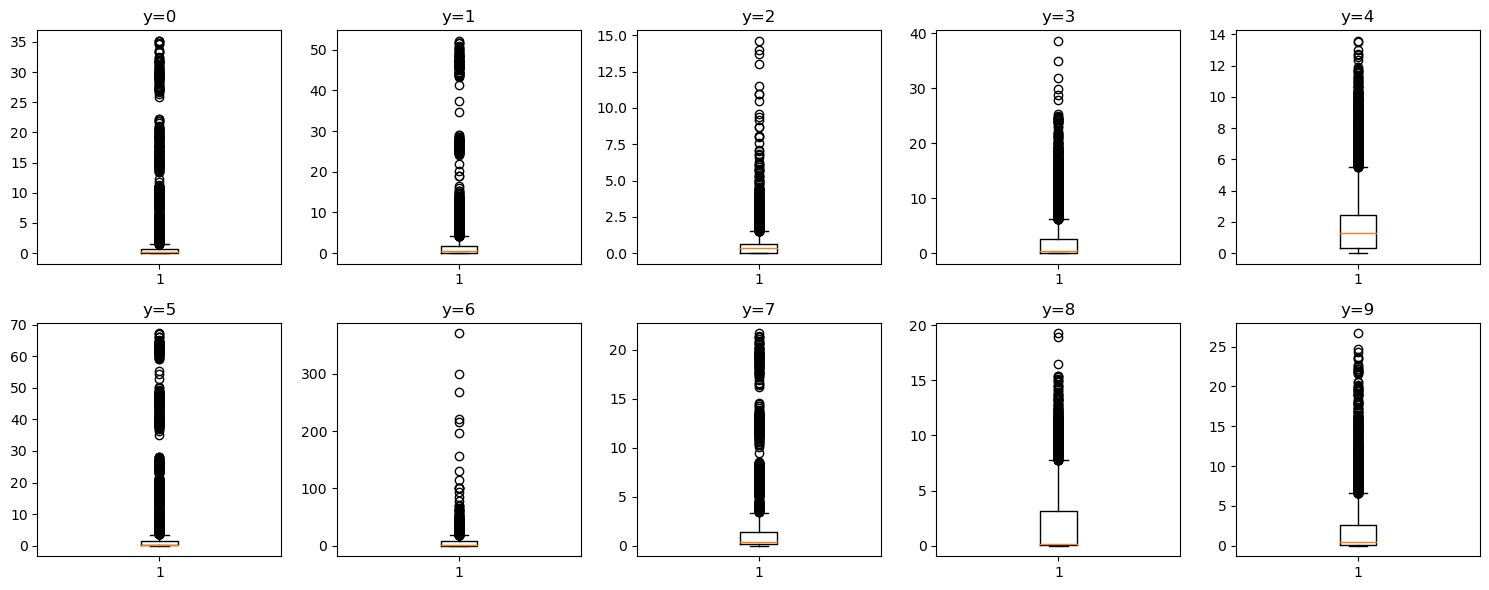

In [22]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
axs = ax.ravel()
for i in range(10):
  axs[i].boxplot(X_mel_train_flat[y_mel_train == i].mean(axis=0))
  axs[i].set_title(f"y={i}")
plt.tight_layout()
plt.show()

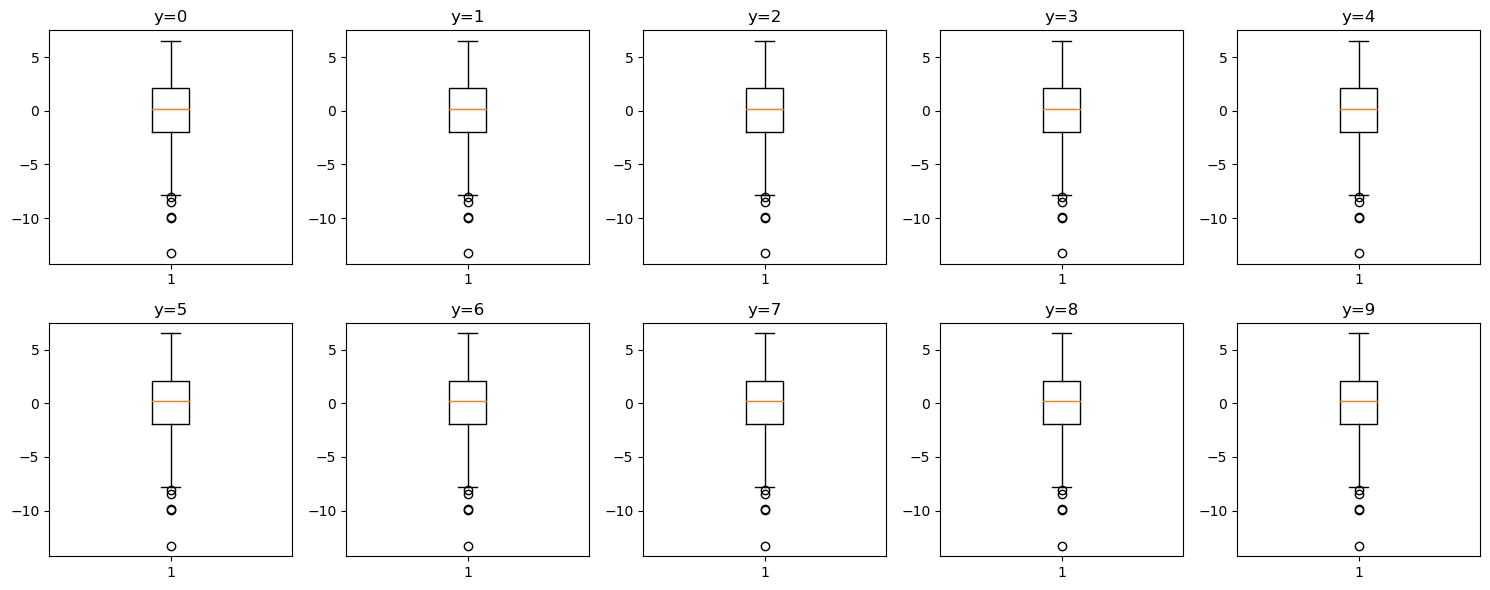

In [23]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
axs = ax.ravel()
for i in range(10):
  axs[i].boxplot(np.log(X_mel_train[y_mel_train == 0][:,0,0]))
  axs[i].set_title(f"y={i}")
plt.tight_layout()
plt.show()

## Evaluation Metrics

In [24]:
def accuracy(y_pred, y_true):
    """
    Returns both the overall accuracy as well as the accuracy for each category.
    """
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)

    results = y_pred == y_true
    classes = set(y_true)
    full_acc = results.mean()
    class_accs = {}
    for c in classes:
        class_accs[c] = results[y_true == c].mean()
    return full_acc, class_accs

In [25]:
accuracy(np.array([1, 2, 3, 4, 5, 5, 4, 3]), np.array([1, 1, 2, 2, 3, 3, 4, 5]))

(0.25, {1: 0.5, 2: 0.0, 3: 0.0, 4: 1.0, 5: 0.0})

## Logistic Regression (Baseline Model)

### Logistic Regression 1: Raw Amplitude Features

In [86]:
from sklearn.linear_model import LogisticRegression

# create our LogisticRegression classifier (add penalty and class_weight parameters later)
log_amp_model = LogisticRegression(tol=0.0001, max_iter=500)

log_amp_model.fit(X_amp_train, y_amp_train)

y_amp_train_preds = log_amp_model.predict(X_amp_train)
y_amp_test_preds = log_amp_model.predict(X_amp_test)

In [90]:
accuracy(y_amp_train_preds, y_amp_train)

(0.9773095623987034,
 {0: 0.9928571428571429,
  1: 0.9898477157360406,
  2: 0.9813218390804598,
  3: 0.9502868068833652,
  4: 0.9901153212520593,
  5: 0.9764216366158114,
  6: 0.9759036144578314,
  7: 0.9954407294832827,
  8: 0.9416167664670658,
  9: 0.9814285714285714})

In [87]:
accuracy(y_amp_test_preds, y_amp_test)

(0.17888029130632682,
 {0: 0.2866666666666667,
  1: 0.0,
  2: 0.34448160535117056,
  3: 0.1222707423580786,
  4: 0.011363636363636364,
  5: 0.3068181818181818,
  6: 0.06666666666666667,
  7: 0.0423728813559322,
  8: 0.13983050847457626,
  9: 0.15666666666666668})

### Logistic Regression 2: Mel Spectrogram Features

In [94]:
# create our LogisticRegression classifier (add penalty and class_weight parameters later)
log_mel_model = LogisticRegression(tol=0.0001, max_iter=500)

log_mel_model.fit(X_mel_train_flat, y_mel_train)

y_mel_train_preds = log_mel_model.predict(X_mel_train_flat)
y_mel_test_preds = log_mel_model.predict(X_mel_test_flat)

/Users/karinawang/opt/anaconda3/envs/cs181/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
accuracy(y_mel_train_preds, y_mel_train)

(0.9387718350441203,
 {0: 0.9442857142857143,
  1: 0.9796954314720813,
  2: 0.9497126436781609,
  3: 0.9082217973231358,
  4: 0.9719934102141681,
  5: 0.8959778085991679,
  6: 0.9879518072289156,
  7: 0.9893617021276596,
  8: 0.8967065868263473,
  9: 0.9357142857142857})

In [96]:
accuracy(y_mel_test_preds, y_mel_test)

(0.34774692762858445,
 {0: 0.21666666666666667,
  1: 0.38461538461538464,
  2: 0.3377926421404682,
  3: 0.1965065502183406,
  4: 0.4431818181818182,
  5: 0.4090909090909091,
  6: 0.7333333333333333,
  7: 0.4406779661016949,
  8: 0.5211864406779662,
  9: 0.21333333333333335})

### Logistic Regression 2a: Mel Spectrogram Features With LASSO Regularization

In [29]:
from sklearn.linear_model import LogisticRegression

# create our LogisticRegression classifier (add penalty and class_weight parameters later)
log_mel_model_lasso = LogisticRegression(penalty='l1', tol=0.0001, max_iter=100, solver='liblinear')

log_mel_model_lasso.fit(X_mel_train_flat, y_mel_train)

y_mel_train_preds_lasso = log_mel_model_lasso.predict(X_mel_train_flat)
y_mel_test_preds_lasso = log_mel_model_lasso.predict(X_mel_test_flat)

/Users/karinawang/opt/anaconda3/envs/cs181/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
accuracy(y_mel_train_preds_lasso, y_mel_train)

(0.9402124977489645,
 {0: 0.9828571428571429,
  1: 0.9695431472081218,
  2: 0.9540229885057471,
  3: 0.8948374760994264,
  4: 0.9719934102141681,
  5: 0.8959778085991679,
  6: 0.9759036144578314,
  7: 0.993920972644377,
  8: 0.8547904191616766,
  9: 0.9542857142857143})

In [33]:
accuracy(y_mel_test_preds_lasso, y_mel_test)

(0.3054164770141102,
 {0: 0.3333333333333333,
  1: 0.41025641025641024,
  2: 0.3010033444816054,
  3: 0.07860262008733625,
  4: 0.3522727272727273,
  5: 0.32196969696969696,
  6: 0.43333333333333335,
  7: 0.4491525423728814,
  8: 0.4110169491525424,
  9: 0.17666666666666667})